In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import glob
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error, r2_score


warnings.filterwarnings('ignore')

In [199]:
path = '..\\data\\storm_data'
all_files = glob.glob(path + "/*.csv")

print("CSV Files found:", all_files)


dataframes = []

for filename in all_files:
  df = pd.read_csv(filename, usecols=['state','event_type','damage_property'])
  df = df[df["state"] == "Florida"]
  dataframes.append(df)

total_df = pd.concat(dataframes, ignore_index=True)

# wet to dry natural disasters
event_type_mapping = {'flood':1, 'flash flood':1, 'thunderstorm wind':2, 'tornado':3}

total_df['event_type'] = total_df['event_type'].map(event_type_mapping)

del total_df['state']

total_df = total_df.dropna()

Q1 = total_df['damage_property'].quantile(0.25)
Q3 = total_df['damage_property'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

total_df = total_df[(total_df['damage_property'] >= lower_bound) & (total_df['damage_property'] <= upper_bound)]

pd.set_option('display.max_rows', 2000)

print(total_df)

array = total_df.values

x = array[:,0]
y = array[:,1]

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)


CSV Files found: ['..\\data\\storm_data\\storms_2013.csv', '..\\data\\storm_data\\storms_2014.csv', '..\\data\\storm_data\\storms_2017.csv', '..\\data\\storm_data\\Storms_2018.csv', '..\\data\\storm_data\\Storms_2019.csv', '..\\data\\storm_data\\Storms_2020.csv']
      event_type  damage_property
103          1.0              0.0
105          1.0              0.0
110          1.0           1000.0
114          1.0           1000.0
115          1.0           3000.0
...          ...              ...
5811         2.0              0.0
5812         2.0           3000.0
5813         2.0              0.0
5814         2.0              0.0
5815         2.0              0.0

[2706 rows x 2 columns]


In [200]:
regressor = RandomForestRegressor(n_estimators=50, random_state=0, oob_score=True)

regressor.fit(x, y)


RandomForestRegressor(n_estimators=50, oob_score=True, random_state=0)

In [201]:
oob_score = regressor.oob_score_
print(f'out of bag score: {oob_score}')

predictions = regressor.predict(x)

mse = root_mean_squared_error(y, predictions)
print(f'mean squared error: {mse}')

r2 = r2_score(y, predictions)
print(f'r squared: {r2}')

out of bag score: 0.04076862450323171
mean squared error: 1248.825086182865
r squared: 0.043477618095616566


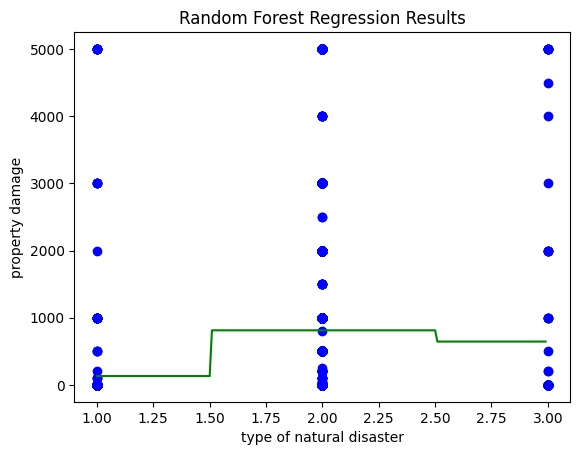

Predicted property damage: 131.83827803751018


In [202]:
X_grid = np.arange(min(x),max(x),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
  
plt.scatter(x,y, color='blue') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='green') #plotting for predict points
  
plt.title("Random Forest Regression Results")
plt.xlabel('type of natural disaster')
plt.ylabel('property damage')
plt.show()

new_disaster_type = [[1]]  # Example input value representing the disaster type you want to predict for

# Predict the property damage for this input
predicted_damage = regressor.predict(new_disaster_type)
print("Predicted property damage:", predicted_damage[0])